In [147]:
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [148]:
norm_info = pd.read_csv('../MAML_filter64/MAML_filter64_inner_loop.csv')
# norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [149]:
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [150]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,layer_dict.conv0.conv.bias_grad_mean,layer_dict.conv0.conv.bias_grad_L1norm,...,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_weight_var,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var
num_step,,,,,,,,,,,,,,,,,,,,,
0,-0.001811,342.244105,13.197841,0.109494,-0.006278,225.969574,6.973840,0.030646,1.540504e-09,1.988049e-06,...,6.696251,0.007649,3.980150e-09,1.560625,0.872084,0.193077,0.007827,0.711975,0.387866,0.048339
1,0.002166,121.104192,4.753261,0.015053,-0.006259,226.050404,6.975190,0.030657,4.845094e-10,1.251096e-06,...,6.679816,0.007629,8.419762e-10,1.492548,0.834992,0.178606,0.007827,0.704274,0.383027,0.046991
2,-0.001285,88.145286,3.440408,0.007595,-0.006281,226.058486,6.975377,0.030658,3.362121e-10,9.510180e-07,...,6.679723,0.007630,1.093946e-09,1.153282,0.646568,0.110851,0.007827,0.694606,0.380300,0.046579
3,0.000626,38.632026,1.462212,0.001326,-0.006268,226.059999,6.975491,0.030660,-5.443744e-12,3.506831e-07,...,6.682862,0.007634,9.543327e-10,0.397565,0.214891,0.013347,0.007827,0.691216,0.377913,0.045742
4,0.000065,16.285363,0.618563,0.000272,-0.006275,226.061724,6.975510,0.030660,-5.598419e-12,1.529386e-07,...,6.683547,0.007634,9.278537e-10,0.116708,0.063333,0.001579,0.007827,0.693224,0.378866,0.046011


In [151]:
per_inner_loop_step['layer_dict.linear.weights_grad_L2norm']

num_step
0    35.648458
1    33.595890
2    25.529032
3     9.564392
4     3.061429
Name: layer_dict.linear.weights_grad_L2norm, dtype: float64

In [152]:
per_inner_loop_step['layer_dict.linear.weights_weight_L2norm']

num_step
0    6.696251
1    6.679816
2    6.679723
3    6.682862
4    6.683547
Name: layer_dict.linear.weights_weight_L2norm, dtype: float64

In [153]:
per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm']

num_step
0    2.259178
1    1.211412
2    1.053866
3    0.501754
4    0.208094
Name: layer_dict.conv3.conv.weight_grad_L2norm, dtype: float64

In [154]:
per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm']

num_step
0    27.709915
1    27.709927
2    27.709930
3    27.709933
4    27.709934
Name: layer_dict.conv3.conv.weight_weight_L2norm, dtype: float64

In [155]:
# specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values = norm_info_train
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,...,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_weight_var,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var
0,0,train,0,-0.032995,292.193787,9.928967,0.055995,-0.002310,87.122437,2.401502,...,3.173050,0.001258,1.490116e-09,0.340724,0.163542,0.006686,0.000000e+00,0.000000,0.000000,0.000000e+00
1,0,train,1,0.007652,198.423828,7.242973,0.030318,-0.001980,87.191414,2.403553,...,3.171742,0.001257,0.000000e+00,0.528762,0.299470,0.022421,-1.164153e-11,0.003407,0.001635,6.686460e-07
2,0,train,2,-0.023648,183.577820,6.371302,0.022946,-0.002057,87.198936,2.404644,...,3.173821,0.001259,0.000000e+00,0.350284,0.216573,0.011726,1.164153e-11,0.003572,0.002139,1.143493e-06
3,0,train,3,0.007395,67.656982,2.346432,0.003133,-0.001820,87.257782,2.405488,...,3.175456,0.001260,4.470349e-09,0.165785,0.095749,0.002292,4.656613e-11,0.003084,0.001637,6.697092e-07
4,0,train,4,0.002679,34.005054,1.241698,0.000886,-0.001894,87.268379,2.405602,...,3.176969,0.001261,1.862645e-09,0.041093,0.021569,0.000116,-3.492460e-11,0.003669,0.001704,7.260406e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796995,49999,train,0,-0.058381,504.485596,17.743130,0.178882,-0.008209,323.180634,9.979309,...,14.192131,0.025146,0.000000e+00,1.599988,0.894421,0.199997,1.174731e-02,1.321052,0.675021,1.137407e-01
796996,49999,train,1,0.031881,92.873260,3.462296,0.005924,-0.007625,323.386902,9.980886,...,14.185497,0.025122,-1.192093e-08,1.556321,0.870213,0.189318,1.174730e-02,1.309052,0.667046,1.110651e-01
796997,49999,train,2,-0.008521,93.588303,3.660016,0.007684,-0.007944,323.358643,9.980947,...,14.186049,0.025124,-5.960465e-09,1.383979,0.775184,0.150227,1.174731e-02,1.297053,0.665031,1.103940e-01
796998,49999,train,3,0.000353,43.376980,1.500453,0.001303,-0.007859,323.361267,9.981013,...,14.188347,0.025132,7.450581e-10,0.390114,0.213540,0.011400,1.174730e-02,1.287189,0.658239,1.081471e-01


In [156]:
gr = specific_column_values.groupby('current_iter').mean()
gr

,num_step,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,layer_dict.conv0.conv.bias_grad_mean,...,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_weight_var,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var
current_iter,,,,,,,,,,,,,,,,,,,,,
0,2.0,-0.007141,138.572966,5.072296,0.020750,-0.002013,87.195813,2.404042,0.003342,-1.151511e-08,...,3.174251,0.001259,1.527369e-09,0.250656,0.133502,0.006670,-8.731149e-12,0.002503,0.001295,5.432957e-07
1,2.0,0.002914,149.439716,5.520269,0.027160,-0.002372,87.183612,2.404904,0.003343,2.019078e-11,...,3.171404,0.001257,1.322478e-09,0.304028,0.168006,0.010382,1.999993e-04,0.004704,0.002357,1.421603e-06
2,2.0,-0.002310,152.560577,6.043243,0.027127,-0.002114,87.208908,2.405399,0.003346,-1.532680e-09,...,3.170331,0.001256,2.267770e-09,0.332023,0.189693,0.014685,1.334894e-04,0.004570,0.002319,1.419925e-06
3,2.0,0.009895,152.039104,5.856911,0.027997,-0.002669,87.164922,2.406314,0.003346,-5.027687e-10,...,3.169096,0.001255,1.434237e-09,0.500521,0.277600,0.031788,-7.961184e-05,0.005574,0.003027,2.449023e-06
4,2.0,-0.001955,139.652877,5.128843,0.020269,-0.002251,87.148507,2.405936,0.003347,3.375499e-09,...,3.167645,0.001254,2.766028e-09,0.487270,0.266811,0.033014,-2.206957e-04,0.005128,0.002888,2.409380e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.0,-0.010046,131.216648,4.911504,0.032928,-0.007774,323.296844,9.979646,0.057608,-1.111658e-09,...,14.187294,0.025129,3.473833e-09,0.923167,0.520285,0.099213,1.174322e-02,1.302203,0.665848,1.106735e-01
49996,2.0,-0.013116,149.001712,5.484648,0.036192,-0.007666,323.315616,9.979951,0.057613,-3.796174e-10,...,14.187626,0.025130,-7.078052e-10,1.048517,0.580682,0.113000,1.174295e-02,1.302226,0.665736,1.106366e-01
49997,2.0,-0.004920,160.052158,5.834629,0.045317,-0.007956,323.297528,9.980458,0.057614,2.184015e-09,...,14.187187,0.025128,-1.788139e-09,1.027064,0.573599,0.109624,1.174393e-02,1.301610,0.665438,1.105380e-01


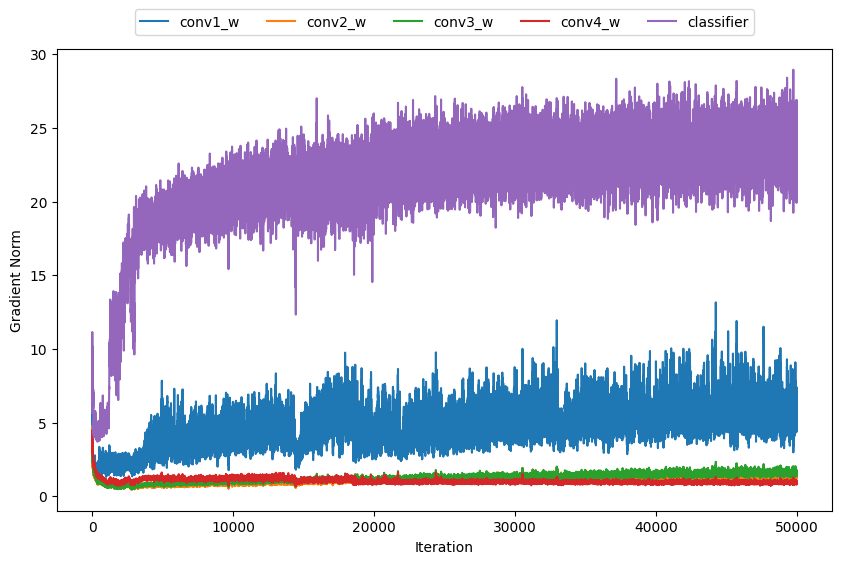

In [163]:
# 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_grad_L2norm', 
                   'layer_dict.conv1.conv.weight_grad_L2norm', 
                   'layer_dict.conv2.conv.weight_grad_L2norm',
                   'layer_dict.conv3.conv.weight_grad_L2norm',
                   'layer_dict.linear.weights_grad_L2norm']

columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
#plt.ylim(10 ** -2, 10 **2)

plt.show()  # 그래프 보여주기

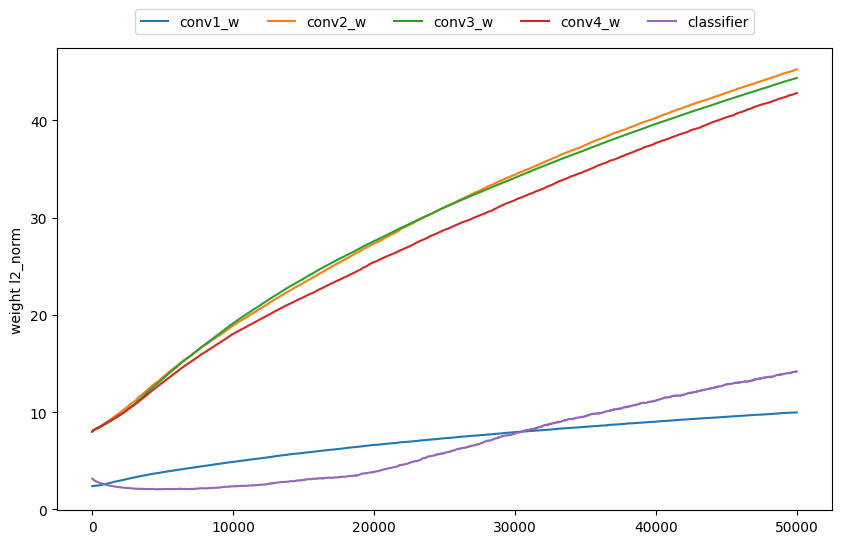

In [158]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

plt.show()  # 그래프 보여주기

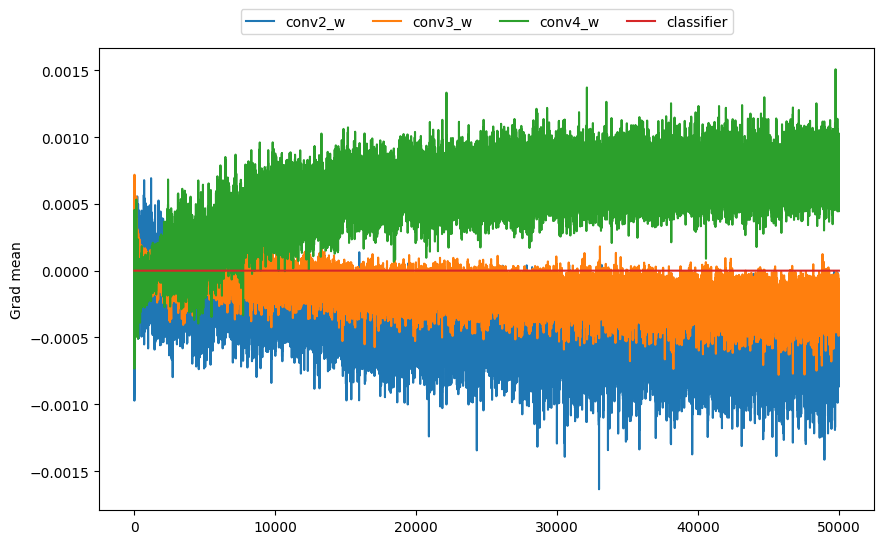

In [159]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ #'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = [#'conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

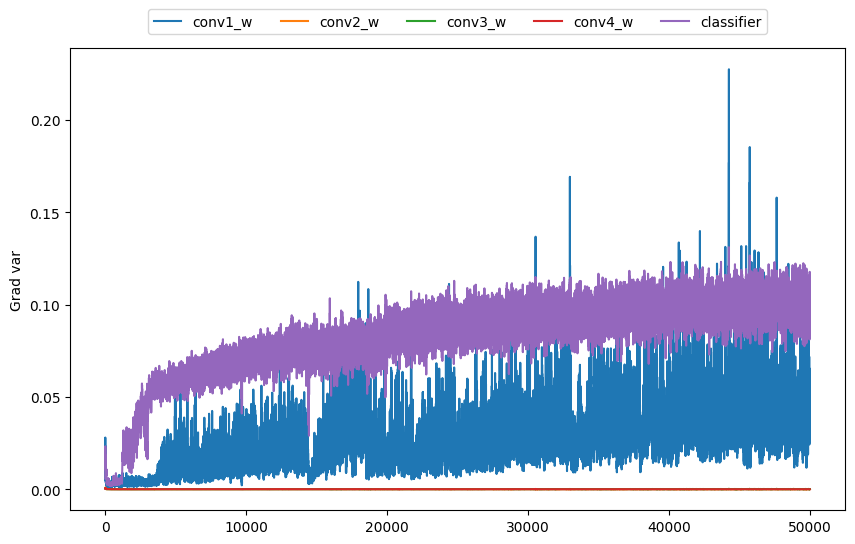

In [160]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_var', 
                    'layer_dict.conv1.conv.weight_grad_var', 
                    'layer_dict.conv2.conv.weight_grad_var',
                    'layer_dict.conv3.conv.weight_grad_var',
                    'layer_dict.linear.weights_grad_var'
]
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier'
]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad var')  

# plt.yscale('log', base=10)


plt.show()  # 그래프 보여주기

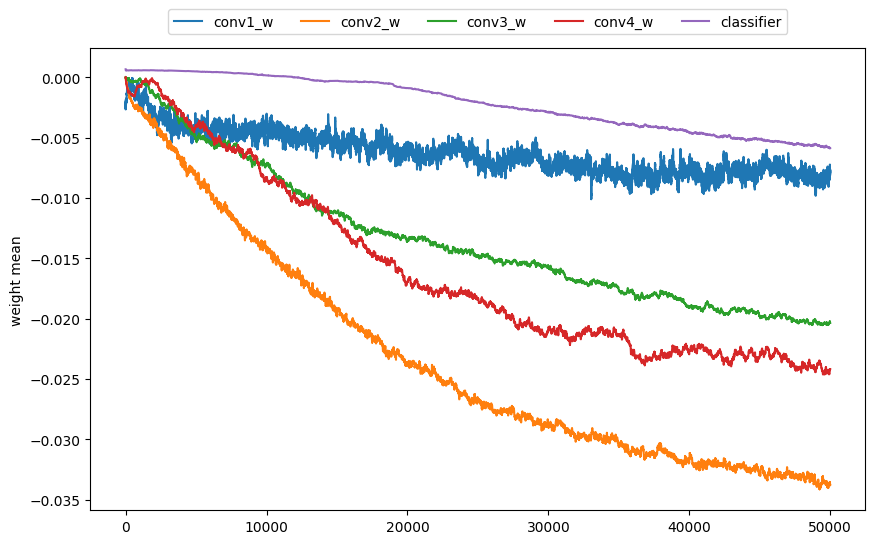

In [161]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

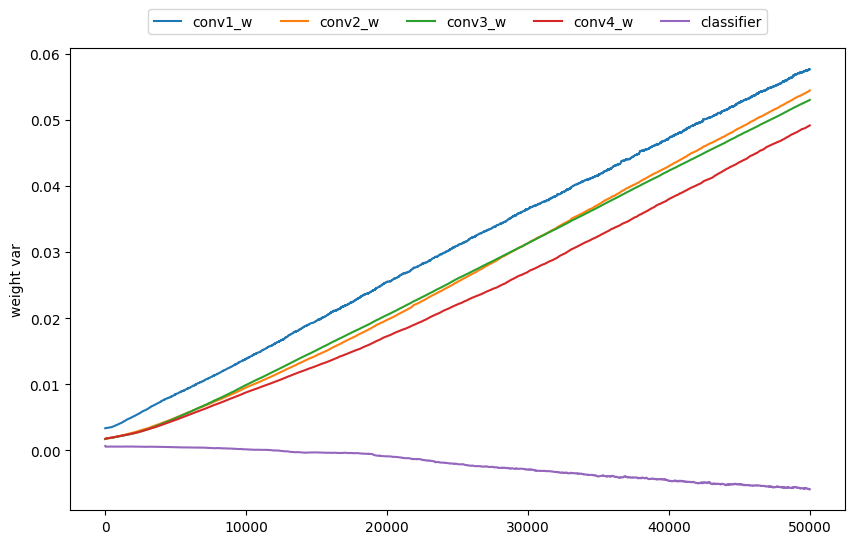

In [162]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_var', 
                    'layer_dict.conv1.conv.weight_weight_var', 
                    'layer_dict.conv2.conv.weight_weight_var',
                    'layer_dict.conv3.conv.weight_weight_var',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기